# Nutrition: Systolic blood pressure

The aim of these analyses are therefore to determine whether a variety of features (diet, age, sex, income, exercise, smoking, alcohol use, muscle_mass etc.) predict systolic blood pressure.

Since all the dependent variables are continious, I will be using the following supervised regression models: 

* Multiple linear regression (forward method), 
* Regression tree, 
* Random forest, 
* Gradient boosting tree
* Support vector regression.

## 1. Install and import the necesary packages and libraries

I already have the most recent versions of **pandas, numpy, seaborn and matplotlib** installed, but you can install them using pip (see pypi.org) or conda install in Anaconda prompt (see anaconda.org). If you get the ImportError: cannot import name 'html5lib' from 'pip._vendor', you can install html5lib in Anaconda prompt (conda install -c anaconda html5lib).

Currently installed versions: 
<br>Pandas 1.4.4
<br>numpy 1.21.5
<br>seaborn 0.12.2
<br>matplotlib 3.5.1
<br>scikit learn 1.1.1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from tabulate import tabulate
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV

## 2. Read csv file into Pandas dataframe

In [2]:
# Read the csv file into the pandas dataframe
df2 = pd.read_csv('nutrition2.csv')

# If the rows are truncated so we can't see the full list, you can correct that with:
pd.set_option('display.max_rows', None)

# Let's display max columns too 
pd.set_option('display.max_columns', None)

df2.head()

,Unnamed: 0,id,age,sex,income,items_home,exercise_stren,exercise_mod,fruit_juice,fruit,veg,red_meat,chicken,pork,fish,eggs,bread,pap_samp,rice_pasta,dairy,soft_drinks,take_away,smoke,alcohol,avg_systbp,avg_diabp,body_fat,muscle_mass,bmi,visceral_fat,metabolic_age,bfat_rarm,bfat_rleg,bfat_trunk,ecw_percentage,fat_rarm,fat_rleg,fat_trunk,muscle_rarm,muscle_rleg,muscle_trunk,left_grip,right_grip,sitting_height,standing_height,exercise,fruitveg_index,carbs_index,protein_index,junkfood_index,avg_grip,age_scaled,fruit_juice_scaled,fruit_scaled,veg_scaled,red_meat_scaled,chicken_scaled,pork_scaled,fish_scaled,eggs_scaled,bread_scaled,pap_samp_scaled,rice_pasta_scaled,dairy_scaled,soft_drinks_scaled,take_away_scaled,avg_systbp_scaled,avg_diabp_scaled,body_fat_scaled,muscle_mass_scaled,bmi_scaled,visceral_fat_scaled,metabolic_age_scaled,bfat_rarm_scaled,bfat_rleg_scaled,bfat_trunk_scaled,ecw_percentage_scaled,fat_rarm_scaled,fat_rleg_scaled,fat_trunk_scaled,muscle_rarm_scaled,muscle_rleg_scaled,muscle_trunk_scaled,sitting_height_scaled,standing_height_scaled,exercise_scaled,fruitveg_index_scaled,carbs_index_scaled,protein_index_scaled,junkfood_index_scaled,avg_grip_scaled,pc1_bodycomp,pc2_bodycomp
0,0,1,20.8,1,2,7,0,1,2,5,8,3,3,0,0,1,6,4,4,8,6,3,False,True,119.0,71.5,3.2,51.7,18.1,1,12,7.0,2.0,3.0,38.4,0.2,0.2,0.9,3.0,9.8,26.6,50,50,131.5,176.4,1,15,14,7,9,50.0,0.258929,0.25,0.625,1.000,0.375,0.375,0.0,0.00,0.125,0.750,0.500,0.500,1.000,0.750,0.375,0.587629,0.492958,0.000000,0.498851,0.111913,0.000000,0.000000,0.031311,0.000000,0.000000,0.313433,0.000000,0.000000,0.000000,0.545455,0.602410,0.465753,0.746388,0.581395,0.047619,0.714286,0.583333,0.285714,0.5625,0.724490,-1.106312,0.227749
1,1,2,20.6,0,2,9,0,7,0,0,5,0,5,0,0,6,8,6,6,4,2,5,False,True,119.0,74.0,20.3,36.2,17.4,1,12,18.1,29.2,14.3,40.6,0.4,2.6,3.7,1.7,6.0,21.0,23,26,129.9,165.8,7,5,20,11,7,24.5,0.241071,0.00,0.000,0.625,0.000,0.625,0.0,0.00,0.750,1.000,0.750,0.750,0.500,0.250,0.625,0.587629,0.528169,0.372549,0.142529,0.086643,0.000000,0.000000,0.248532,0.509363,0.261574,0.477612,0.052632,0.235294,0.124444,0.151515,0.144578,0.210046,0.720706,0.375969,0.333333,0.238095,0.833333,0.476190,0.4375,0.204082,-0.318955,-0.635933
2,2,3,19.9,0,2,4,0,7,0,2,4,1,1,0,4,0,8,0,8,3,1,2,False,False,101.5,63.0,20.0,33.3,18.5,1,12,22.5,30.1,11.8,40.9,0.5,2.6,2.7,1.5,5.7,19.1,22,24,123.2,154.0,7,6,16,6,3,23.0,0.178571,0.00,0.250,0.500,0.125,0.125,0.0,0.50,0.000,1.000,0.000,1.000,0.375,0.125,0.250,0.407216,0.373239,0.366013,0.075862,0.126354,0.000000,0.000000,0.334638,0.526217,0.203704,0.500000,0.078947,0.235294,0.080000,0.090909,0.108434,0.123288,0.613162,0.147287,0.333333,0.285714,0.666667,0.238095,0.1875,0.173469,-0.252522,-0.825377
3,3,4,23.1,0,2,9,3,5,0,8,2,0,4,0,0,3,1,0,5,4,1,0,False,False,117.0,78.0,39.6,42.9,29.6,6,38,45.4,42.6,36.4,44.8,1.7,5.7,14.8,1.9,7.3,24.6,31,35,124.5,159.0,11,10,6,7,1,33.0,0.464286,0.00,1.000,0.250,0.000,0.500,0.0,0.00,0.375,0.125,0.000,0.625,0.500,0.125,0.000,0.567010,0.584507,0.793028,0.296552,0.527076,0.357143,0.838710,0.782779,0.760300,0.773148,0.791045,0.394737,0.539216,0.617778,0.212121,0.301205,0.374429,0.634029,0.244186,0.523810,0.476190,0.250000,0.285714,0.0625,0.377551,1.085679,-0.022105
4,4,5,22.5,0,1,9,0,5,4,7,3,4,5,0,2,2,8,5,2,0,5,6,False,False,118.5,83.0,24.6,42.0,22.3,1,15,23.0,35.1,17.5,40.8,0.7,3.8,5.5,2.1,6.6,24.8,24,30,127.5,162.5,5,14,15,13,11,27.0,0.410714,0.50,0.875,0.375,0.500,0.625,0.0,0.25,0.250,1.000,0.625,0.250,0.000,0.625,0.750,0.582474,0.654930,0.466231,0.275862,0.263538,0.000000,0.096774,0.344423,0.619850,0.335648,0.492537,0.131579,0.352941,0.204444,0.272727,0.216867,0.383562,0.682183,0.312016,0.238095,0.666667,0.625000,0.571429,0.6875,0.255102,-0.062037,-0.399174


In [3]:
df2 = df2.drop(['Unnamed: 0'], axis=1)
df2.head()

,id,age,sex,income,items_home,exercise_stren,exercise_mod,fruit_juice,fruit,veg,red_meat,chicken,pork,fish,eggs,bread,pap_samp,rice_pasta,dairy,soft_drinks,take_away,smoke,alcohol,avg_systbp,avg_diabp,body_fat,muscle_mass,bmi,visceral_fat,metabolic_age,bfat_rarm,bfat_rleg,bfat_trunk,ecw_percentage,fat_rarm,fat_rleg,fat_trunk,muscle_rarm,muscle_rleg,muscle_trunk,left_grip,right_grip,sitting_height,standing_height,exercise,fruitveg_index,carbs_index,protein_index,junkfood_index,avg_grip,age_scaled,fruit_juice_scaled,fruit_scaled,veg_scaled,red_meat_scaled,chicken_scaled,pork_scaled,fish_scaled,eggs_scaled,bread_scaled,pap_samp_scaled,rice_pasta_scaled,dairy_scaled,soft_drinks_scaled,take_away_scaled,avg_systbp_scaled,avg_diabp_scaled,body_fat_scaled,muscle_mass_scaled,bmi_scaled,visceral_fat_scaled,metabolic_age_scaled,bfat_rarm_scaled,bfat_rleg_scaled,bfat_trunk_scaled,ecw_percentage_scaled,fat_rarm_scaled,fat_rleg_scaled,fat_trunk_scaled,muscle_rarm_scaled,muscle_rleg_scaled,muscle_trunk_scaled,sitting_height_scaled,standing_height_scaled,exercise_scaled,fruitveg_index_scaled,carbs_index_scaled,protein_index_scaled,junkfood_index_scaled,avg_grip_scaled,pc1_bodycomp,pc2_bodycomp
0,1,20.8,1,2,7,0,1,2,5,8,3,3,0,0,1,6,4,4,8,6,3,False,True,119.0,71.5,3.2,51.7,18.1,1,12,7.0,2.0,3.0,38.4,0.2,0.2,0.9,3.0,9.8,26.6,50,50,131.5,176.4,1,15,14,7,9,50.0,0.258929,0.25,0.625,1.000,0.375,0.375,0.0,0.00,0.125,0.750,0.500,0.500,1.000,0.750,0.375,0.587629,0.492958,0.000000,0.498851,0.111913,0.000000,0.000000,0.031311,0.000000,0.000000,0.313433,0.000000,0.000000,0.000000,0.545455,0.602410,0.465753,0.746388,0.581395,0.047619,0.714286,0.583333,0.285714,0.5625,0.724490,-1.106312,0.227749
1,2,20.6,0,2,9,0,7,0,0,5,0,5,0,0,6,8,6,6,4,2,5,False,True,119.0,74.0,20.3,36.2,17.4,1,12,18.1,29.2,14.3,40.6,0.4,2.6,3.7,1.7,6.0,21.0,23,26,129.9,165.8,7,5,20,11,7,24.5,0.241071,0.00,0.000,0.625,0.000,0.625,0.0,0.00,0.750,1.000,0.750,0.750,0.500,0.250,0.625,0.587629,0.528169,0.372549,0.142529,0.086643,0.000000,0.000000,0.248532,0.509363,0.261574,0.477612,0.052632,0.235294,0.124444,0.151515,0.144578,0.210046,0.720706,0.375969,0.333333,0.238095,0.833333,0.476190,0.4375,0.204082,-0.318955,-0.635933
2,3,19.9,0,2,4,0,7,0,2,4,1,1,0,4,0,8,0,8,3,1,2,False,False,101.5,63.0,20.0,33.3,18.5,1,12,22.5,30.1,11.8,40.9,0.5,2.6,2.7,1.5,5.7,19.1,22,24,123.2,154.0,7,6,16,6,3,23.0,0.178571,0.00,0.250,0.500,0.125,0.125,0.0,0.50,0.000,1.000,0.000,1.000,0.375,0.125,0.250,0.407216,0.373239,0.366013,0.075862,0.126354,0.000000,0.000000,0.334638,0.526217,0.203704,0.500000,0.078947,0.235294,0.080000,0.090909,0.108434,0.123288,0.613162,0.147287,0.333333,0.285714,0.666667,0.238095,0.1875,0.173469,-0.252522,-0.825377
3,4,23.1,0,2,9,3,5,0,8,2,0,4,0,0,3,1,0,5,4,1,0,False,False,117.0,78.0,39.6,42.9,29.6,6,38,45.4,42.6,36.4,44.8,1.7,5.7,14.8,1.9,7.3,24.6,31,35,124.5,159.0,11,10,6,7,1,33.0,0.464286,0.00,1.000,0.250,0.000,0.500,0.0,0.00,0.375,0.125,0.000,0.625,0.500,0.125,0.000,0.567010,0.584507,0.793028,0.296552,0.527076,0.357143,0.838710,0.782779,0.760300,0.773148,0.791045,0.394737,0.539216,0.617778,0.212121,0.301205,0.374429,0.634029,0.244186,0.523810,0.476190,0.250000,0.285714,0.0625,0.377551,1.085679,-0.022105
4,5,22.5,0,1,9,0,5,4,7,3,4,5,0,2,2,8,5,2,0,5,6,False,False,118.5,83.0,24.6,42.0,22.3,1,15,23.0,35.1,17.5,40.8,0.7,3.8,5.5,2.1,6.6,24.8,24,30,127.5,162.5,5,14,15,13,11,27.0,0.410714,0.50,0.875,0.375,0.500,0.625,0.0,0.25,0.250,1.000,0.625,0.250,0.000,0.625,0.750,0.582474,0.654930,0.466231,0.275862,0.263538,0.000000,0.096774,0.344423,0.619850,0.335648,0.492537,0.131579,0.352941,0.204444,0.272727,0.216867,0.383562,0.682183,0.312016,0.238095,0.666667,0.625000,0.571429,0.6875,0.255102,-0.062037,-0.399174


## 3. Feature selection

We will use individual correlations to select features instead of sequential feature selection (see vcoetzee/compare for why I prefer individual correlations).

In [4]:
# I'd also like to include a body composition measure 
   # (i.e. muscle_mass, visceral_fat or body_fat) in the blood pressure analyses, 
   # but they are bound to be correlated with each other and standing_height_scaled, which will cause issues with multicolinearity
df2[['avg_systbp', 'muscle_mass_scaled', 'body_fat_scaled', 'visceral_fat_scaled', 
     'standing_height_scaled']].corr()

# Muscle_mass has the highest correlation with avg_systbp
# Muscle_mass was strongly correlated with visceral_fat and standing_height, but not with body_fat
# I will therefore only include muscle_mass and body_fat as potential features, even though standing_height is more easy to measure than muscle_mass (a model with standing_height instead of muscle_mass explains significantly less variance)

,avg_systbp,muscle_mass_scaled,body_fat_scaled,visceral_fat_scaled,standing_height_scaled
avg_systbp,1.000000,0.506730,0.030261,0.351125,0.260455
muscle_mass_scaled,0.506730,1.000000,-0.218678,0.425196,0.716831
body_fat_scaled,0.030261,-0.218678,1.000000,0.627087,-0.438465
visceral_fat_scaled,0.351125,0.425196,0.627087,1.000000,-0.010395
standing_height_scaled,0.260455,0.716831,-0.438465,-0.010395,1.000000


In [5]:
# Select the variables we want to use 
# Minimally transformed - Scaled 
   # (see vcoetzee/compare for why I prefer MinMax scaled, minimally transformed variables)
bp = df2[['age_scaled', 'sex', 'income', 'items_home', 'exercise_scaled','fruitveg_index_scaled', 
          'carbs_index_scaled', 'protein_index_scaled', 'junkfood_index_scaled', 'dairy_scaled', 
          'smoke', 'alcohol', 'muscle_mass_scaled', 'body_fat_scaled', 'avg_systbp']]

In [6]:
# Identify the most highly correlated variables
bp.corrwith(bp['avg_systbp']).sort_values(ascending=False)

# The most highly correlated variables are: muscle_mass_scaled(0.506730), 
   # dairy_scaled(0.150156) and alcohol(0.100561)

avg_systbp               1.000000
muscle_mass_scaled       0.506730
dairy_scaled             0.150156
alcohol                  0.100561
income                   0.075015
sex                      0.067210
protein_index_scaled     0.063095
fruitveg_index_scaled    0.061404
exercise_scaled          0.058617
age_scaled               0.049169
items_home               0.039393
smoke                    0.037713
body_fat_scaled          0.030261
carbs_index_scaled      -0.036269
junkfood_index_scaled   -0.087205
dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


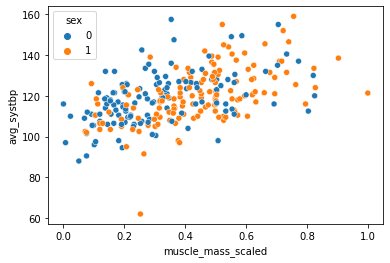

In [7]:
# Visualise the relationships
print(sns.scatterplot(data=bp, x='muscle_mass_scaled', y='avg_systbp', hue='sex'))

# People with more muscle tend to have a higher BP
# One possible multivariate outlier

AxesSubplot(0.125,0.125;0.775x0.755)


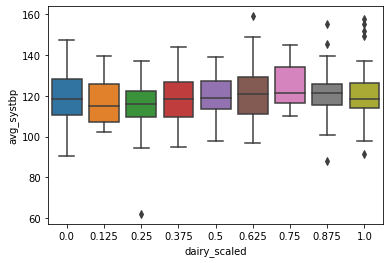

In [8]:
print(sns.boxplot(data=bp, x='dairy_scaled', y='avg_systbp'))
# Weak correlation

AxesSubplot(0.125,0.125;0.775x0.755)


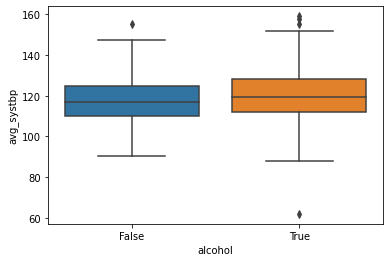

In [9]:
print(sns.boxplot(data=bp, x='alcohol', y='avg_systbp'))

## 4. Forward linear regression

In [10]:
# Define testing and traing set
x = df2[['age_scaled', 'sex', 'income', 'items_home', 'exercise_scaled','fruitveg_index_scaled', 
         'carbs_index_scaled', 'protein_index_scaled', 'junkfood_index_scaled', 'dairy_scaled', 
         'smoke', 'alcohol', 'muscle_mass_scaled', 'body_fat_scaled']].values
y = df2[['avg_systbp']].values #.values creates a numpy array

# Splitting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (216, 14) (216, 1)
Test set: (54, 14) (54, 1)


In [11]:
# Fit the model - according to correlations
# Step 1
x_train1 = x_train[:, [12]]  # muscle_mass_scaled
x_test1 = x_test[:, [12]]
lr1 = LinearRegression()
lr1.fit(x_train1, y_train)

# Evaluate the model
y_pred_lr1=lr1.predict(x_test1)

# Evaluate the predictions
lr_R21 = r2_score(y_test, y_pred_lr1)
lr_MSE1 = mean_squared_error(y_test, y_pred_lr1)
print('Step1 R2:', lr_R21)
print('Step1 MSE:', lr_MSE1)
print()
  
#_________________________________
# Step 2
x_train2 = x_train[:, [12,9]]  # muscle_mass_scaled, dairy_scaled
x_test2 = x_test[:, [12,9]]
lr2 = LinearRegression()
lr2.fit(x_train2, y_train)

# Evaluate the model
y_pred_lr2 = lr2.predict(x_test2)

# Evaluate the predictions
lr_R22 = r2_score(y_test, y_pred_lr2)
lr_MSE2 = mean_squared_error(y_test, y_pred_lr2)
print('Step2 R2:', lr_R22)
print('Step2 MSE:', lr_MSE2)
print()
  
#____________________________________
# Step 3
x_train3 = x_train[:, [12,9,11]]  # muscle_mass_scaled, dairy_scaled, alcohol
x_test3 = x_test[:, [12,9,11]]
lr3 = LinearRegression()
lr3.fit(x_train3, y_train)

# Evaluate the model
y_pred_lr3 = lr3.predict(x_test3)

# Evaluate the predictions
lr_R23 = r2_score(y_test, y_pred_lr3)
lr_MSE3 = mean_squared_error(y_test, y_pred_lr3)
print('Step3 R2:', lr_R23)
print('Step3 MSE:', lr_MSE3)
print()

#____________________________________
# Step 4
x_train4 = x_train[:, [12,9,11,8]]  # muscle_mass_scaled, dairy_scaled, alcohol, junkfood_index_scaled
x_test4 = x_test[:, [12,9,11,8]]
lr4 = LinearRegression()
lr4.fit(x_train4, y_train)

# Evaluate the model
y_pred_lr4 = lr4.predict(x_test4)

# Evaluate the predictions
lr_R24 = r2_score(y_test, y_pred_lr4)
lr_MSE4 = mean_squared_error(y_test, y_pred_lr4)
print('Step4 R2:', lr_R24)
print('Step4 MSE:', lr_MSE4)
print()

#____________________________________
# Step 5
x_train5 = x_train[:, [12,9,11,8,2]]  # muscle_mass_scaled, dairy_scaled, alcohol, junkfood_index_scaled, income
x_test5 = x_test[:, [12,9,11,8,2]]
lr5 = LinearRegression()
lr5.fit(x_train5, y_train)

# Evaluate the model
y_pred_lr5 = lr5.predict(x_test5)

# Evaluate the predictions
lr_R25 = r2_score(y_test, y_pred_lr5)
lr_MSE5 = mean_squared_error(y_test, y_pred_lr5)
print('Step5 R2:', lr_R25)
print('Step5 MSE:', lr_MSE5)
print()

# Step 4 (muscle_mass_scaled, dairy_scaled, alcohol, junkfood_index_scaled) produced the highest r2 and the lowest MSE

Step1 R2: 0.17797287904582038
Step1 MSE: 101.40251427441223

Step2 R2: 0.2074352096070763
Step2 MSE: 97.76813978829142

Step3 R2: 0.2126614550262108
Step3 MSE: 97.12344764589567

Step4 R2: 0.26118718841664923
Step4 MSE: 91.13747559294373

Step5 R2: 0.25992103892554697
Step5 MSE: 91.2936635562995



In [12]:
# Check for multicolinearity

# Convert numpy to df
vif_df = pd.DataFrame(x_train4, columns = ['muscle_mass_scaled', 'dairy_scaled', 'alcohol', 'junkfood_index'])

# Convert datatypes to float
vif_df[['muscle_mass_scaled', 'dairy_scaled', 'alcohol', 'junkfood_index']] = vif_df[[
    'muscle_mass_scaled', 'dairy_scaled', 'alcohol', 'junkfood_index']].astype('float')


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns

  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_df.values, i)
                          for i in range(len(vif_df.columns))]

  
print(vif_data)

# Generally, a VIF above 5 indicates a high multicollinearity and a VIF above 10 needs to be corrected
# All VIF values acceptable

              feature       VIF
0  muscle_mass_scaled  3.429228
1        dairy_scaled  2.928927
2             alcohol  2.627862
3      junkfood_index  3.026205


## 5. Regression tree

In [13]:
# Create the regressor
rt = DecisionTreeRegressor(random_state=1)

# Train the regressor 
rt.fit(x_train, y_train)

# Predicting the test data
y_pred_rt = rt.predict(x_test)

# Evaluate the predictions
# Calculate R2 score (higher R2=better performance) and MSE scores (lower MSE = better performance)
rt_R2 = r2_score(y_test, y_pred_rt)
rt_MSE = mean_squared_error(y_test, y_pred_rt)
print('Regression tree R2:', rt_R2)
print('Regression tree MSE:', rt_MSE)
print()

Regression tree R2: -0.7448652796156883
Regression tree MSE: 215.24074074074073



## 4. Random Forest

In [14]:
# Flatten y 
y_train1_1 = np.ravel(y_train, order = 'C')
print('y_train shape:', y_train1_1.shape)
y_test1_1 = np.ravel(y_test, order = 'C')
print('y_test shape:', y_test1_1.shape)

# Create the regressor
rf = RandomForestRegressor(n_estimators = 1000, random_state=1)

# Train the regressor
rf.fit(x_train, y_train1_1) 

# Predicting the test data
y_pred_rf = rf.predict(x_test)

# Evaluate the predictions
# Calculate R2 score (higher R2=better performance) and MSE scores (lower MSE = better performance)
rf_R2 = r2_score(y_test1_1, y_pred_rf)
rf_MSE = mean_squared_error(y_test, y_pred_rf)
print('Random Forest R2:', rf_R2)
print('Random Forest MSE:', rf_MSE)

y_train shape: (216,)
y_test shape: (54,)
Random Forest R2: 0.013037178738614763
Random Forest MSE: 121.74843021614896


## 5. Gradient boosting tree

In [15]:
# Create the regressor
gb = GradientBoostingRegressor(random_state=1)

# Train the regressor
gb.fit(x_train, y_train1_1) 

# Predicting the test data
y_pred_gb = gb.predict(x_test)

# Evaluate the predictions
# Calculate R2 score (higher R2=better pegbormance) and MSE scores (lower MSE = better pegbormance)
gb_R2 = r2_score(y_test1_1, y_pred_gb)
gb_MSE = mean_squared_error(y_test, y_pred_rf)
print('Gradient Boost R2:', gb_R2)
print('Gradient Boost MSE:', gb_MSE)

Gradient Boost R2: 0.09599829337958665
Gradient Boost MSE: 121.74843021614896


## 6. Support Vector Regression

In [16]:
# Create the regressor
svr = svm.SVR()

# Train the regressor
svr.fit(x_train, y_train1_1) 

# Predicting the test data
y_pred_svr = svr.predict(x_test)

# Evaluate the predictions
# Calculate R2 score (higher R2=better pesvrormance) and MSE scores (lower MSE = better pesvrormance)
svr_R2 = r2_score(y_test1_1, y_pred_svr)
svr_MSE = mean_squared_error(y_test, y_pred_svr)
print('Support vector R2:', svr_R2)
print('Support vector MSE:', svr_MSE)

Support vector R2: 0.008951935238445508
Support vector MSE: 122.25237218081249


In [17]:
print('Model comparison')
table = [['Description', 'R2', 'MSE'], ['Linear regr', lr_R24, lr_MSE4], 
         ['Regr Tree', rt_R2, rt_MSE], ['Random Forest', rf_R2, rf_MSE], 
         ['Gradient Boost', gb_R2, gb_MSE], ['Support vector', svr_R2, svr_MSE]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

# Linear regression produced the highest R2 and lowest MSE

Model comparison
╒════════════════╤═════════════╤══════════╕
│ Description    │          R2 │      MSE │
╞════════════════╪═════════════╪══════════╡
│ Linear regr    │  0.261187   │  91.1375 │
├────────────────┼─────────────┼──────────┤
│ Regr Tree      │ -0.744865   │ 215.241  │
├────────────────┼─────────────┼──────────┤
│ Random Forest  │  0.0130372  │ 121.748  │
├────────────────┼─────────────┼──────────┤
│ Gradient Boost │  0.0959983  │ 121.748  │
├────────────────┼─────────────┼──────────┤
│ Support vector │  0.00895194 │ 122.252  │
╘════════════════╧═════════════╧══════════╛


In [18]:
# Let's see if we can improve the linear regression model further
# identify the potential outlier
print(bp.shape)
bp[['avg_systbp']].sort_values(['avg_systbp'], ascending=True)

(270, 15)


,avg_systbp
214,62.000000
30,88.000000
160,90.500000
139,91.500000
116,94.500000
211,95.000000
33,96.000000
29,97.000000
205,97.000000
243,97.500000


In [19]:
# Drop the potential outlier
bp2 = bp.drop(index=[214])

# reset index, because we dropped the row
bp2.reset_index(drop=True, inplace=True)

bp2.shape

(269, 15)

In [20]:
# Identify the most highly correlated variables
bp2.corrwith(bp2['avg_systbp']).sort_values(ascending=False)

# The individual correlations with avg_systbp are changed somewhat 
   # (i.e. muscle_mass_scaled more highly correlated, feature ranking changed)

avg_systbp               1.000000
muscle_mass_scaled       0.515191
dairy_scaled             0.142999
alcohol                  0.117339
sex                      0.085910
smoke                    0.074714
exercise_scaled          0.072699
income                   0.066264
protein_index_scaled     0.060379
fruitveg_index_scaled    0.051250
age_scaled               0.043938
body_fat_scaled          0.042725
items_home               0.025422
carbs_index_scaled      -0.058134
junkfood_index_scaled   -0.071328
dtype: float64

In [21]:
# Define testing and traing set
x2 = df2[['age_scaled', 'sex', 'income', 'items_home', 'exercise_scaled','fruitveg_index_scaled', 
          'carbs_index_scaled', 'protein_index_scaled', 'junkfood_index_scaled', 'dairy_scaled', 
          'smoke', 'alcohol', 'muscle_mass_scaled', 'body_fat_scaled']].values
y2 = df2[['avg_systbp']].values #.values creates a numpy array

# Splitting the dataset into training and test set
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 1)

In [22]:
# Fit the model - according to correlations
# Step 1
x2_train1 = x2_train[:, [12]]  # muscle_mass_scaled
x2_test1 = x2_test[:, [12]]
lr2_1 = LinearRegression()
lr2_1.fit(x2_train1, y2_train)

# Evaluate the model
y2_pred_lr2_1=lr2_1.predict(x2_test1)

# Evaluate the predictions
lr_R22_1 = r2_score(y2_test, y2_pred_lr2_1)
lr_MSE2_1 = mean_squared_error(y2_test, y2_pred_lr2_1)
print('Step1 R2:', lr_R22_1)
print('Step1 MSE:', lr_MSE2_1)
print()
  
#_________________________________
# Step 2
x2_train2 = x2_train[:, [12,9]]  # muscle_mass_scaled, dairy_scaled
x2_test2 = x2_test[:, [12,9]]
lr2_2 = LinearRegression()
lr2_2.fit(x2_train2, y2_train)

# Evaluate the model
y2_pred_lr2_2=lr2_2.predict(x2_test2)

# Evaluate the predictions
lr_R22_2 = r2_score(y2_test, y2_pred_lr2_2)
lr_MSE2_2 = mean_squared_error(y2_test, y2_pred_lr2_2)
print('Step1 R2:', lr_R22_2)
print('Step1 MSE:', lr_MSE2_2)
print()
  
#____________________________________
# Step 3
x2_train3 = x2_train[:, [12,9,11]]  # muscle_mass_scaled, dairy_scaled, alcohol
x2_test3 = x2_test[:, [12,9,11]]
lr2_3 = LinearRegression()
lr2_3.fit(x2_train3, y2_train)

# Evaluate the model
y2_pred_lr2_3 = lr2_3.predict(x2_test3)

# Evaluate the predictions
lr_R22_3 = r2_score(y2_test, y2_pred_lr2_3)
lr_MSE2_3 = mean_squared_error(y2_test, y2_pred_lr2_3)
print('Step3 R2:', lr_R22_3)
print('Step3 MSE:', lr_MSE2_3)
print()

#____________________________________
# Step 4
x2_train4 = x2_train[:, [12,9,11,1]]  # muscle_mass_scaled, dairy_scaled, alcohol, sex
x2_test4 = x2_test[:, [12,9,11,1]]
lr2_4 = LinearRegression()
lr2_4.fit(x2_train4, y2_train)

# Evaluate the model
y2_pred_lr2_4 = lr2_4.predict(x2_test4)

# Evaluate the predictions
lr_R22_4 = r2_score(y2_test, y2_pred_lr2_4)
lr_MSE2_4 = mean_squared_error(y2_test, y2_pred_lr2_4)
print('Step4 R2:', lr_R22_4)
print('Step4 MSE:', lr_MSE2_4)
print()

#____________________________________
# Step 5
x2_train5 = x2_train[:, [12,9,11,1,10]]  # muscle_mass_scaled, dairy_scaled, alcohol, sex, smoke
x2_test5 = x2_test[:, [12,9,11,1,10]]
lr2_5 = LinearRegression()
lr2_5.fit(x2_train5, y2_train)

# Evaluate the model
y2_pred_lr2_5 = lr2_5.predict(x2_test5)

# Evaluate the predictions
lr_R22_5 = r2_score(y2_test, y2_pred_lr2_5)
lr_MSE2_5 = mean_squared_error(y2_test, y2_pred_lr2_5)
print('Step5 R2:', lr_R22_5)
print('Step5 MSE:', lr_MSE2_5)
print()

#____________________________________
# Step 6
x2_train6 = x2_train[:, [12,9,11,1,10,4]]  # muscle_mass_scaled, dairy_scaled, alcohol, sex, smoke, exercise_scaled
x2_test6 = x2_test[:, [12,9,11,1,10,4]]
lr2_6 = LinearRegression()
lr2_6.fit(x2_train6, y2_train)

# Evaluate the model
y2_pred_lr2_6 = lr2_6.predict(x2_test6)

# Evaluate the predictions
lr_R22_6 = r2_score(y2_test, y2_pred_lr2_6)
lr_MSE2_6 = mean_squared_error(y2_test, y2_pred_lr2_6)
print('Step5 R2:', lr_R22_6)
print('Step5 MSE:', lr_MSE2_6)

# Step 5(muscle_mass_scaled, dairy_scaled, alcohol, sex, smoke) has the highest R2 and lowest MSE

Step1 R2: 0.17797287904582038
Step1 MSE: 101.40251427441223

Step1 R2: 0.2074352096070763
Step1 MSE: 97.76813978829142

Step3 R2: 0.2126614550262108
Step3 MSE: 97.12344764589567

Step4 R2: 0.21530006836722182
Step4 MSE: 96.79795713572132

Step5 R2: 0.21677918605264268
Step5 MSE: 96.61549812872975

Step5 R2: 0.21050967434536605
Step5 MSE: 97.38888410856552


In [23]:
print('Model comparison')
table2 = [['Description', 'R2', 'MSE'], ['Linear regr1', lr_R24, lr_MSE4], 
          ['Linear regr2', lr_R22_5, lr_MSE2_5], ['Regr Tree', rt_R2, rt_MSE], 
          ['Random Forest', rf_R2, rf_MSE], ['Gradient Boost', gb_R2, gb_MSE], 
          ['Support vector', svr_R2, svr_MSE]]
print(tabulate(table2, headers='firstrow', tablefmt='fancy_grid'))

# The first linear regression still produced the highest R and lowest MSE

Model comparison
╒════════════════╤═════════════╤══════════╕
│ Description    │          R2 │      MSE │
╞════════════════╪═════════════╪══════════╡
│ Linear regr1   │  0.261187   │  91.1375 │
├────────────────┼─────────────┼──────────┤
│ Linear regr2   │  0.216779   │  96.6155 │
├────────────────┼─────────────┼──────────┤
│ Regr Tree      │ -0.744865   │ 215.241  │
├────────────────┼─────────────┼──────────┤
│ Random Forest  │  0.0130372  │ 121.748  │
├────────────────┼─────────────┼──────────┤
│ Gradient Boost │  0.0959983  │ 121.748  │
├────────────────┼─────────────┼──────────┤
│ Support vector │  0.00895194 │ 122.252  │
╘════════════════╧═════════════╧══════════╛
